## Mall Customers Analyzation

Dataset 🔗 - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

#### Content : 

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data

#### Problem Statement :

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

#### Import Neccesary Libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [133]:
df=pd.read_csv('E:/ML projects/Workspace/dataset/Mall_Customers.csv')

In [134]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [135]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [136]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


#### Taking the values to clustering 

In [137]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

#### Standardization

In [138]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#### TO find how many clusters we use Within-Cluster Sum of Squares (WCSS)

In [139]:
from sklearn.cluster import KMeans

## Elboew method to select the K value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [140]:
wcss

[400.0,
 269.0167937490666,
 157.70400815035947,
 109.22822707921345,
 65.56840815571682,
 55.057348270386,
 53.69713133593474,
 45.111877088073896,
 37.728448661265496,
 31.424772073140463]

#### Plotting the elbow curve by wcss and K 

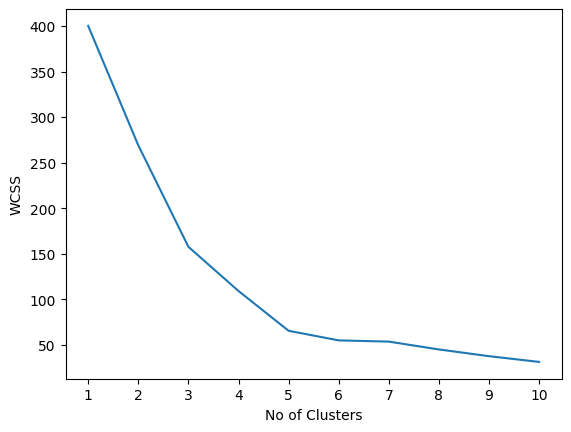

In [141]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

#### TO know how many clusters in the graph , we use kneeLocator

In [142]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [143]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")
print(kl.elbow)

5


#### Taking k i.e, clusters as 5 , which we known by above process

In [144]:
kmeans=KMeans(n_clusters=5,init="k-means++")

#### Training KMeans model

In [145]:
kmeans.fit(x_scaled)

KMeans(n_clusters=5)

#### Predicting by  KMeans model

In [146]:
y=kmeans.predict(x_scaled)

#### Plotting the final output , which shows clusters and their centroids

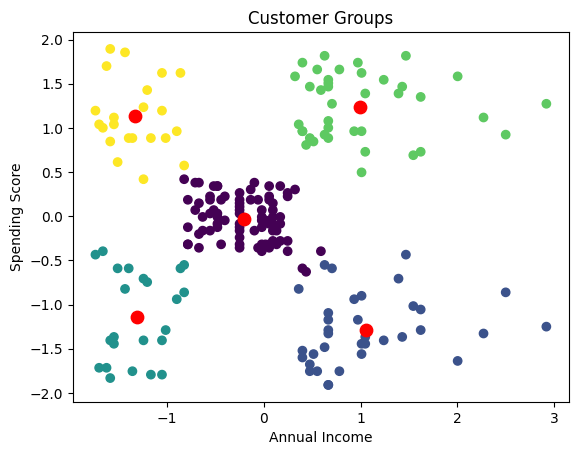

In [147]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=80)
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()